What are the most in demand skills for top 3 most popular data roles

Steps:
1. Clean up the skill column
2. Calculate the skill count
3. Calculate the skill percentage
4. Plot results

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

d:\Anaconda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Loading dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [4]:
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df.job_skills = df.job_skills.apply(lambda x : ast.literal_eval(x) if pd.notna(x) else (x))

In [5]:
df_us = df[df.job_country == 'United States']

In [6]:
df_skills = df_us.explode('job_skills')
df_skills[['job_title_short' , 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [7]:
df_skills_count = df_skills.groupby(['job_skills' , 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count').sort_values(by='skill_count' , ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [8]:
job_titles = df_skills_count.job_title_short.unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

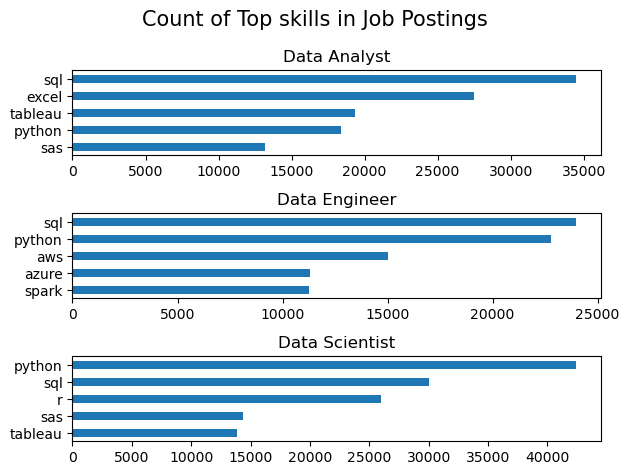

In [9]:
fig , ax = plt.subplots(len(job_titles) , 1)
for i , job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count.job_title_short == job_title].head(5)
    df_plot.plot(kind='barh' , x = 'job_skills' , y ='skill_count' , ax=ax[i] , title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().remove()
fig.suptitle('Count of Top skills in Job Postings' , fontsize = 15)
fig.tight_layout(h_pad=1)
plt.show()

In [10]:
df_job_title_count = df_us.job_title_short.value_counts().reset_index(name = 'jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [12]:

df_skills_perc =  pd.merge(df_skills_count , df_job_title_count , how='left' , on='job_title_short')

In [14]:
df_skills_perc['skill_percent'] = 100 * df_skills_perc.skill_count / df_skills_perc.jobs_total
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


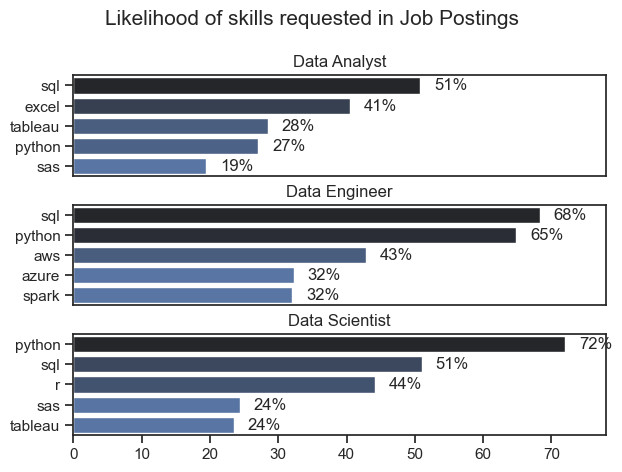

In [39]:
fig , ax = plt.subplots(len(job_titles) , 1)
for i , job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc.job_title_short == job_title].head(5)
    # df_plot.plot(kind='barh' , x = 'job_skills' , y ='skill_percent' , ax=ax[i] , title = job_title)
    sns.barplot(data=df_plot , x = 'skill_percent' , y ='job_skills' , ax = ax[i] ,hue='skill_count' , palette='dark:b_r')
    sns.set_theme(style='ticks')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0 , 78)

    for n , v in enumerate(df_plot.skill_percent):
        ax[i].text(v+2 , n , f'{v:.0f}%' , va='center')
    
    if i != len(job_titles)-1:
        ax[i].set_xticks(())

fig.suptitle('Likelihood of skills requested in Job Postings' , fontsize = 15)
fig.tight_layout(h_pad=0.5)
plt.show() 